In [1]:
import pandas as pd

try:
    df = pd.read_csv('Diabetes.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Diabetes.csv' not found. Please ensure the file is in the correct location.")
    df = None

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Check the shape of the DataFrame.
print("Shape of the DataFrame:", df.shape)

# Examine the data types of each column.
print("\nData types of each column:")
print(df.dtypes)

# Identify any missing values.
print("\nNumber of missing values per column:")
print(df.isnull().sum())

Shape of the DataFrame: (768, 9)

Data types of each column:
pregnancies      int64
glucose          int64
diastolic        int64
triceps          int64
insulin          int64
bmi            float64
dpf            float64
age              int64
diabetes         int64
dtype: object

Number of missing values per column:
pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64


In [3]:
# Generate descriptive statistics for numerical features.
numerical_stats = df.describe()
display(numerical_stats)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


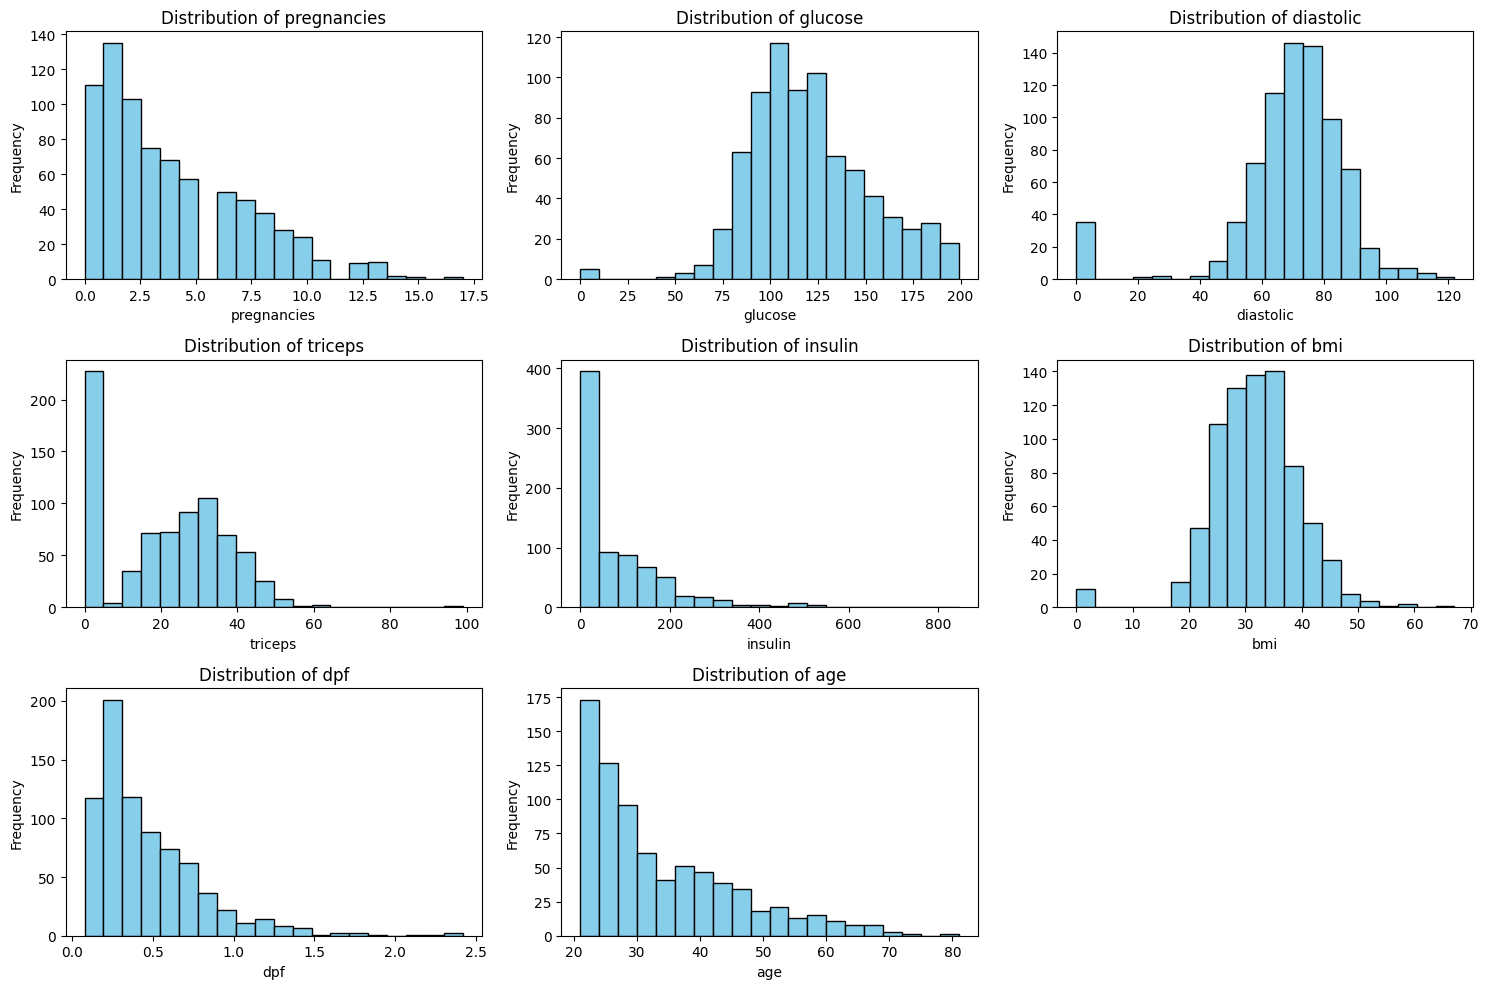

Observations:
Analyzing glucose for minimum values of 0, skewness and outliers.
Analyzing diastolic for minimum values of 0, skewness and outliers.
Analyzing triceps for minimum values of 0, skewness and outliers.
Analyzing insulin for minimum values of 0, skewness and outliers.
Analyzing bmi for minimum values of 0, skewness and outliers.


In [4]:
import matplotlib.pyplot as plt

# Select numerical features for plotting.
numerical_features = ['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age']

# Set up the figure and axes for subplots.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.ravel()

# Iterate over each numerical feature and create a histogram.
for i, feature in enumerate(numerical_features):
    axes[i].hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots.
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better visualization.
plt.tight_layout()
plt.show()

# Analyze histograms for patterns, skewness, multimodality, or outliers.
print("Observations:")
for feature in ['glucose', 'diastolic', 'triceps', 'insulin', 'bmi']:
    print(f"Analyzing {feature} for minimum values of 0, skewness and outliers.")

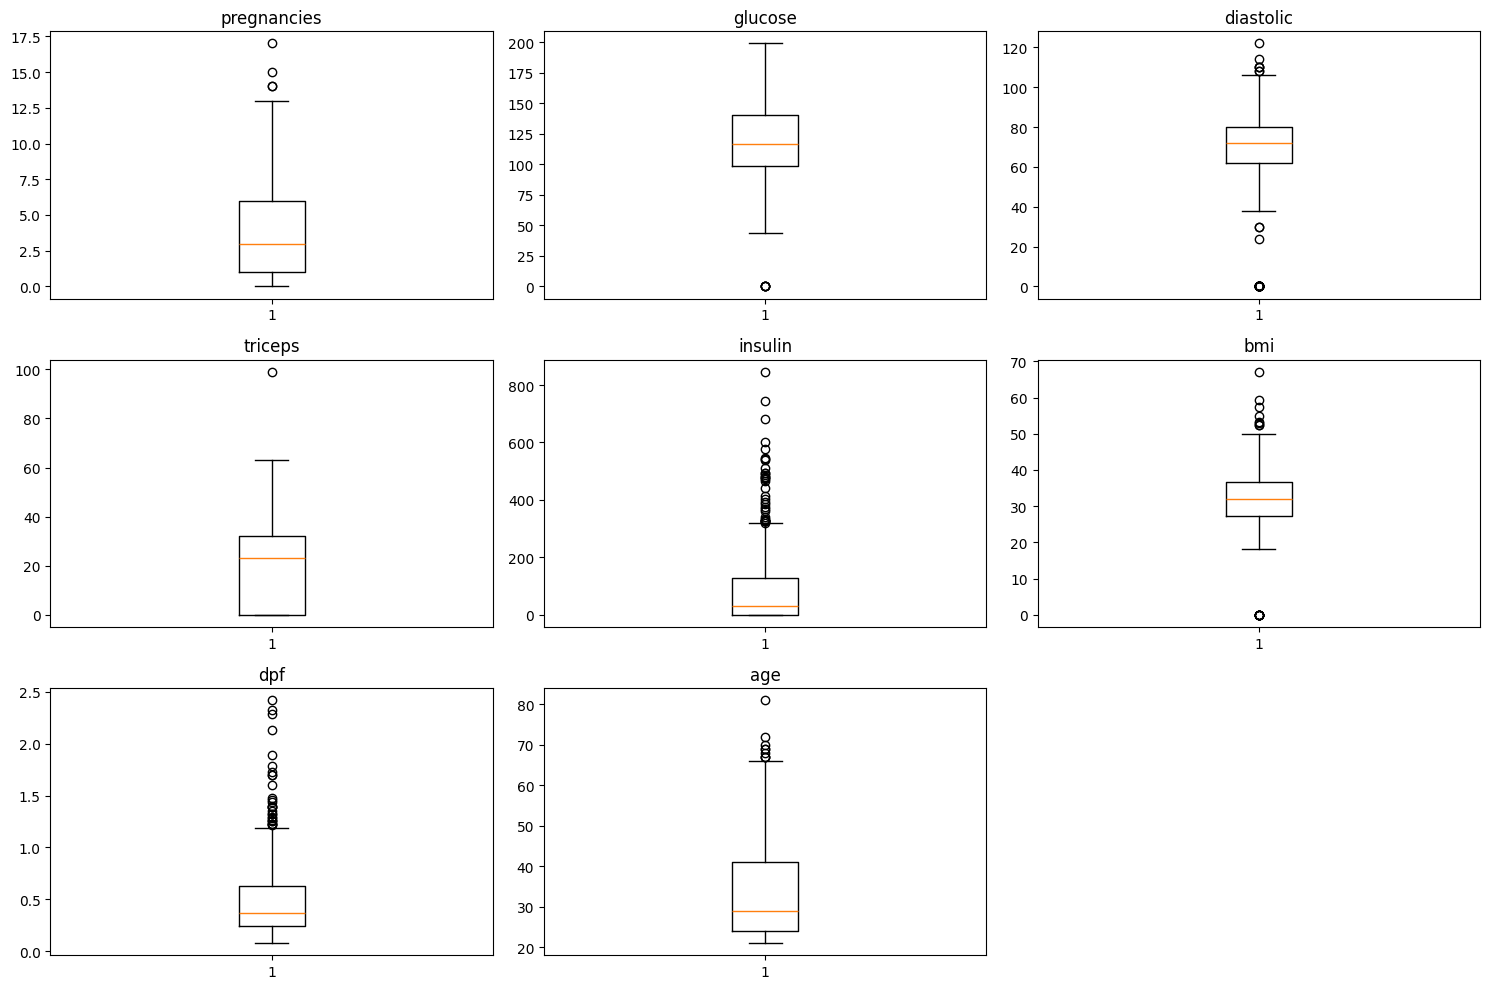

Observations on potential outliers:
pregnancies: 4 outliers detected.
glucose: 5 outliers detected.
diastolic: 45 outliers detected.
triceps: 1 outliers detected.
insulin: 34 outliers detected.
bmi: 19 outliers detected.
dpf: 29 outliers detected.
age: 9 outliers detected.


In [5]:
import matplotlib.pyplot as plt

numerical_features = ['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age']
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

print("Observations on potential outliers:")
for col in numerical_features:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} outliers detected.")

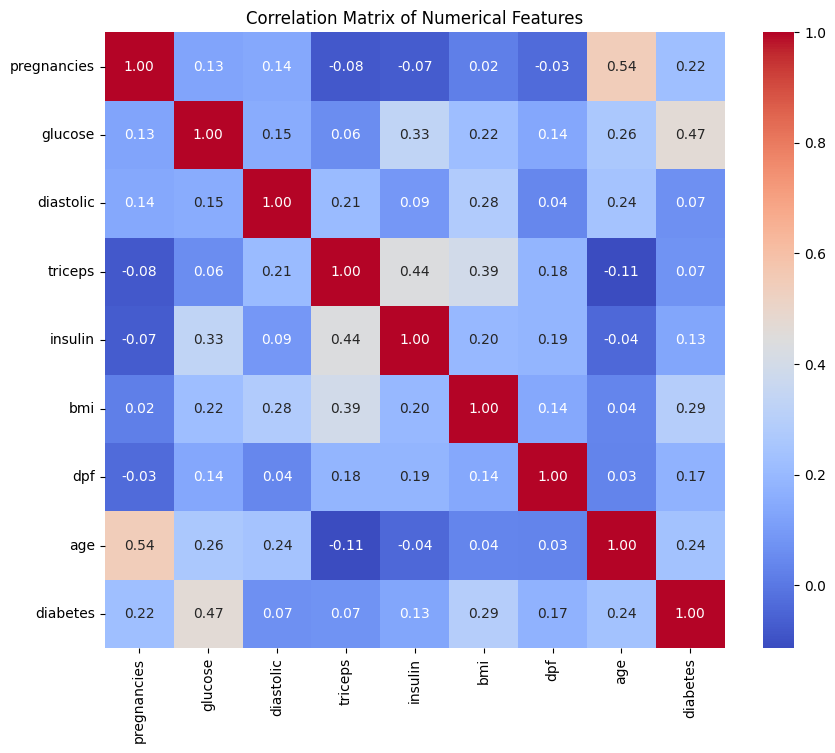

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix.
correlation_matrix = df.corr()

# Visualize the correlation matrix as a heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data exploration

### Subtask:
Analyze the distribution of the target variable 'Outcome' and visualize its relationship with other features.


**Reasoning**:
Analyze the distribution of the 'Outcome' variable and visualize its relationship with other features using value_counts(), bar chart, box plots, violin plots, histograms, and KDEs.



diabetes
0    500
1    268
Name: count, dtype: int64


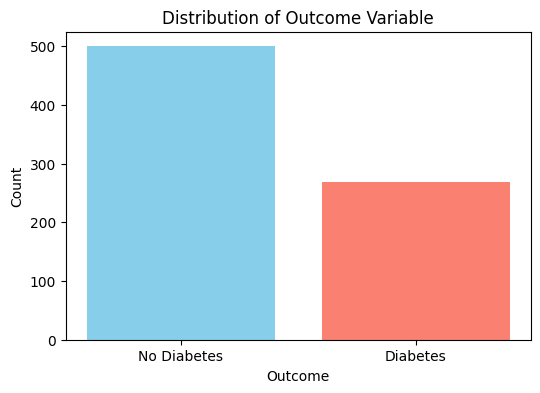

<ipython-input-7-ace9c5cabb87>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y=feature, data=df, palette=['skyblue', 'salmon'])
<ipython-input-7-ace9c5cabb87>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y=feature, data=df, palette=['skyblue', 'salmon'])
<ipython-input-7-ace9c5cabb87>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y=feature, data=df, palette=['skyblue', 'salmon'])
<ipython-input-7-ace9c5cabb87>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

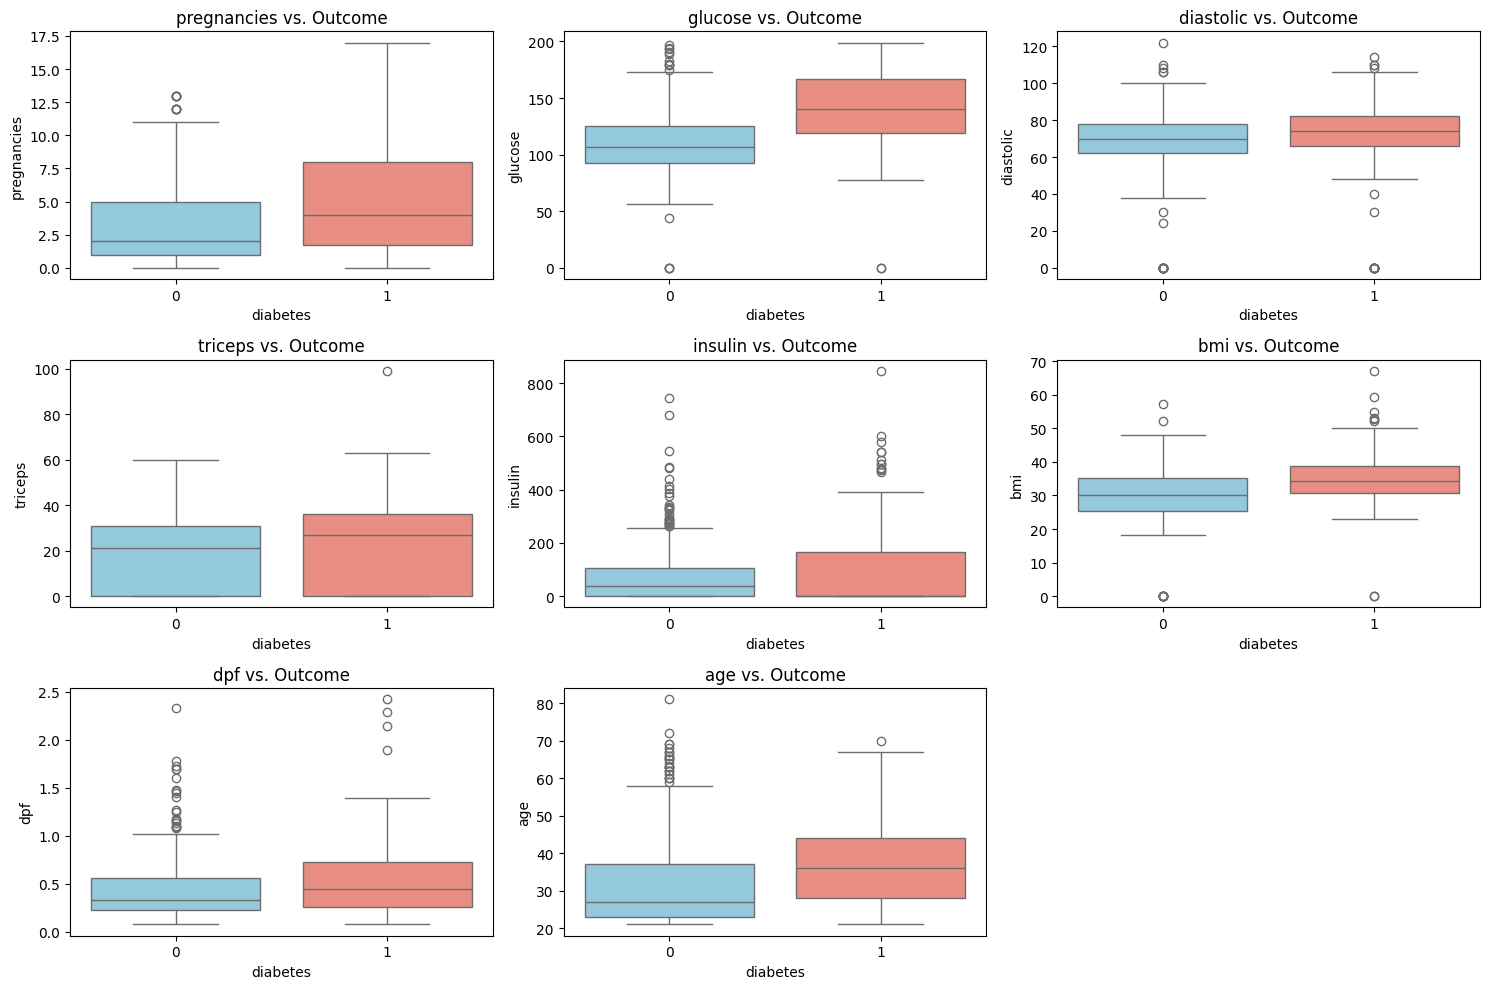

<ipython-input-7-ace9c5cabb87>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diabetes', y=feature, data=df, palette=['skyblue', 'salmon'])
<ipython-input-7-ace9c5cabb87>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diabetes', y=feature, data=df, palette=['skyblue', 'salmon'])
<ipython-input-7-ace9c5cabb87>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diabetes', y=feature, data=df, palette=['skyblue', 'salmon'])
<ipython-input-7-ace9c5cabb87>:31: FutureWarning: 

Passing `palette` without assigning `hue` is dep

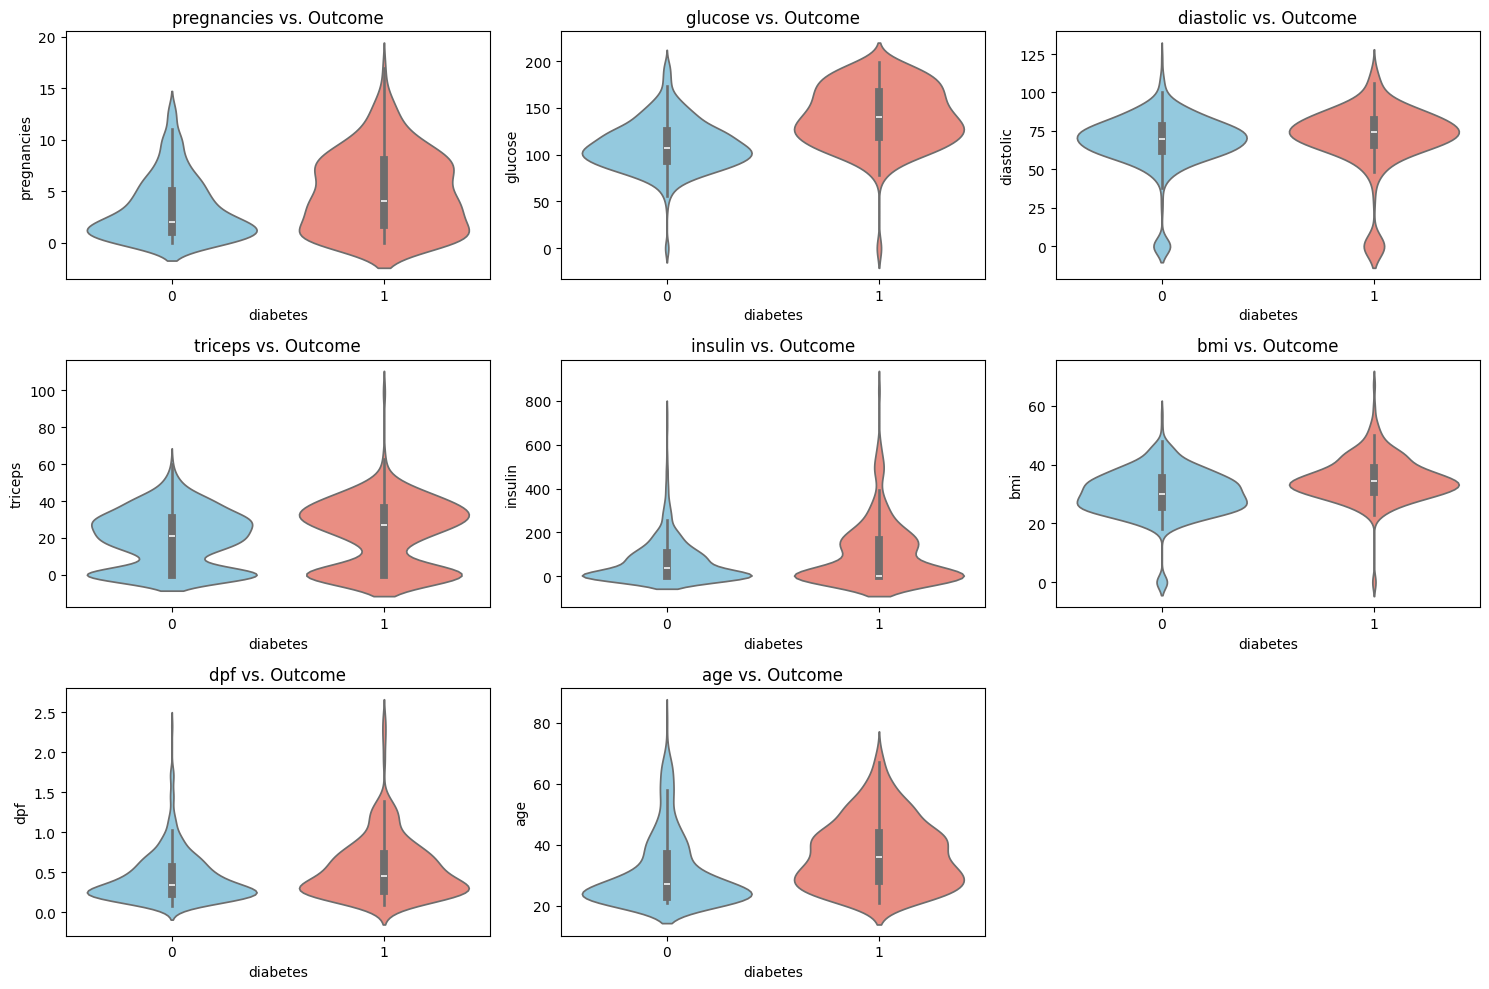

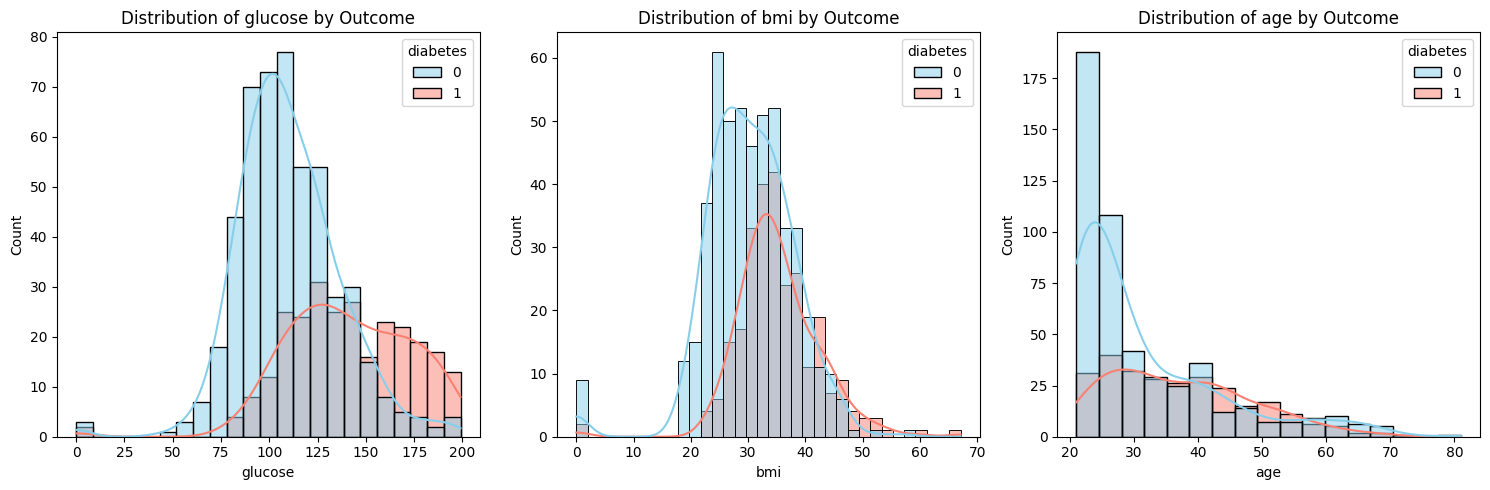

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of the 'Outcome' variable
outcome_counts = df['diabetes'].value_counts()
print(outcome_counts)

plt.figure(figsize=(6, 4))
plt.bar(outcome_counts.index, outcome_counts.values, color=['skyblue', 'salmon'])
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Distribution of Outcome Variable")
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

# Visualize the relationship between numerical features and 'Outcome'
numerical_features = ['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='diabetes', y=feature, data=df, palette=['skyblue', 'salmon'])
    plt.title(f'{feature} vs. Outcome')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(x='diabetes', y=feature, data=df, palette=['skyblue', 'salmon'])
    plt.title(f'{feature} vs. Outcome')

plt.tight_layout()
plt.show()

# Further investigate features with significant differences
features_to_investigate = ['glucose', 'bmi', 'age'] # Example, adjust based on boxplots/violinplots
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features_to_investigate):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data=df, x=feature, hue='diabetes', kde=True, palette=['skyblue', 'salmon'])
    plt.title(f'Distribution of {feature} by Outcome')
plt.tight_layout()
plt.show()